In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA- Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


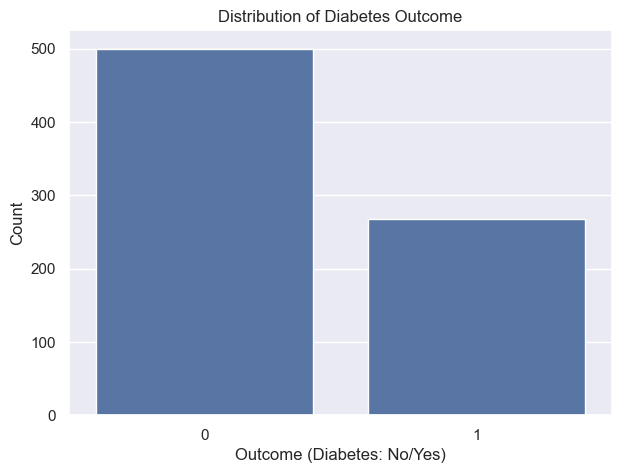

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Assuming 'df' is your DataFrame
sns.set(style="darkgrid")

# Create a countplot for the 'Outcome' variable
plt.figure(figsize=(7, 5))
sns.countplot(x='Outcome', data=df)

# Add labels and title
plt.xlabel('Outcome (Diabetes: No/Yes)')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')

# Show the plot
plt.show()

In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


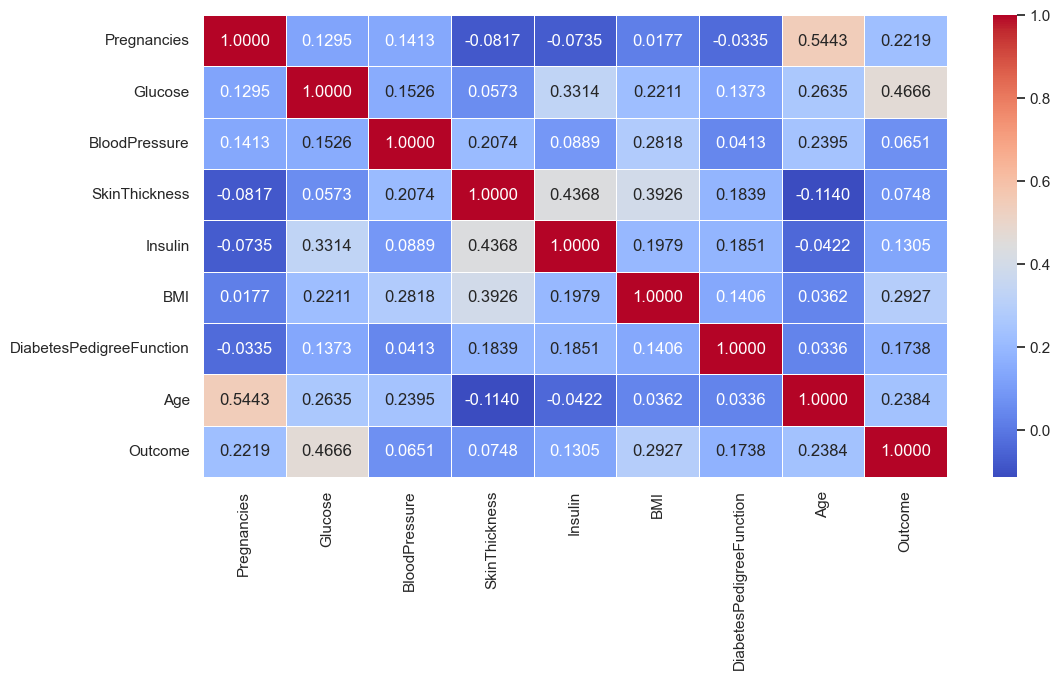

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

# Show the plot
plt.show()

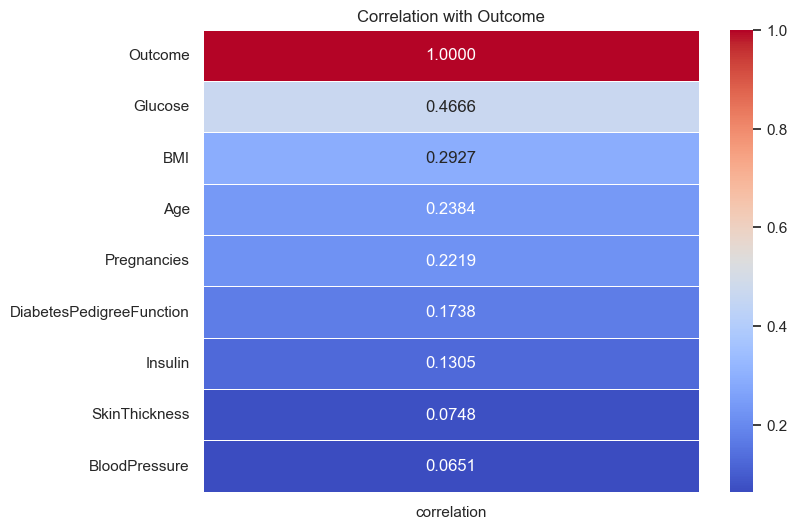

In [11]:
# Calculate the correlation with 'Outcome'
correlation_with_outcome = df.corrwith(df['Outcome']).sort_values(ascending=False)

# Create a heatmap using seaborn for correlation with 'Outcome'
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_with_outcome, columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

# Show the plot
plt.title('Correlation with Outcome')
plt.show()

Data preparation

In [12]:
# saving the features to another df_model
df_model = df[['Pregnancies', 'Age', 'BMI', 'Glucose', 'Outcome', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure']].copy()
print(df_model.shape)

# Deleting 0 values from BMI and Glucose
df_model = df_model[df_model['Glucose'] !=0 ]
df_model = df_model[df_model['BMI'] !=0 ]
df_model = df_model[df_model['Insulin'] !=0 ]
df_model = df_model[df_model['BloodPressure'] !=0 ]
df_model = df_model[df_model['SkinThickness'] !=0 ]
print(df_model.shape)

(768, 9)
(392, 9)


In [13]:
df_model.Outcome.value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

In [14]:
262-130

132

In [15]:
from sklearn.model_selection import train_test_split

# # Split data into features and target
# x = df_merged.drop('Outcome', axis=1)
# y = df_merged['Outcome']


# Split data into features and target
x = df_model.drop('Outcome', axis=1)
y = df_model['Outcome']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)

(313, 8)
(79, 8)


# Standardization

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_mix_scaler = MinMaxScaler()

x_train_scaled = min_mix_scaler.fit_transform(x_train)
x_test_scaled = min_mix_scaler.fit_transform(x_test)

# Modeling & Evaluation

# Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Model Training
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
logreg_model.fit(x_train_scaled, y_train)

# Step 3: Model Evaluation
# Make predictions on the testing set
y_pred = logreg_model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.73

Confusion Matrix:
[[42 10]
 [11 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        52
           1       0.62      0.59      0.60        27

    accuracy                           0.73        79
   macro avg       0.70      0.70      0.70        79
weighted avg       0.73      0.73      0.73        79



# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Step 1: Model Training
# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
decision_tree_model.fit(x_train_scaled, y_train)

# Step 2: Model Evaluation
# Make predictions on the testing set
y_pred_tree = decision_tree_model.predict(x_test_scaled)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

# Display results for Decision Tree
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')
print('\nDecision Tree Confusion Matrix:')
print(conf_matrix_tree)
print('\nDecision Tree Classification Report:')
print(classification_rep_tree)

Decision Tree Accuracy: 0.73

Decision Tree Confusion Matrix:
[[40 12]
 [ 9 18]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        52
           1       0.60      0.67      0.63        27

    accuracy                           0.73        79
   macro avg       0.71      0.72      0.71        79
weighted avg       0.74      0.73      0.74        79



# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
random_forest_model.fit(x_train_scaled, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(x_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display results for Random Forest
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('\nRandom Forest Confusion Matrix:')
print(conf_matrix_rf)
print('\nRandom Forest Classification Report:')
print(classification_rep_rf)

Random Forest Accuracy: 0.72

Random Forest Confusion Matrix:
[[43  9]
 [13 14]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        52
           1       0.61      0.52      0.56        27

    accuracy                           0.72        79
   macro avg       0.69      0.67      0.68        79
weighted avg       0.71      0.72      0.72        79



# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Model Training
# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the scaled training data
knn_model.fit(x_train_scaled, y_train)

# Step 2: Model Evaluation
# Make predictions on the testing set
y_pred_knn = knn_model.predict(x_test_scaled)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Display results for KNN
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('\nKNN Confusion Matrix:')
print(conf_matrix_knn)
print('\nKNN Classification Report:')
print(classification_rep_knn)

KNN Accuracy: 0.73

KNN Confusion Matrix:
[[44  8]
 [13 14]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        52
           1       0.64      0.52      0.57        27

    accuracy                           0.73        79
   macro avg       0.70      0.68      0.69        79
weighted avg       0.73      0.73      0.73        79



# Support Vector Machine SVM

In [23]:
from sklearn.svm import SVC

# Step 1: Model Training
# Create an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust the kernel, C, and gamma parameters

# Train the model on the scaled training data
svm_model.fit(x_train_scaled, y_train)

# Step 2: Model Evaluation
# Make predictions on the testing set
y_pred_svm = svm_model.predict(x_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display results for SVM
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('\nSVM Confusion Matrix:')
print(conf_matrix_svm)
print('\nSVM Classification Report:')
print(classification_rep_svm)


SVM Accuracy: 0.73

SVM Confusion Matrix:
[[45  7]
 [14 13]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.65      0.48      0.55        27

    accuracy                           0.73        79
   macro avg       0.71      0.67      0.68        79
weighted avg       0.72      0.73      0.72        79

